<a href="https://colab.research.google.com/github/ogundipe/AkinwaleDataScience/blob/master/Dissertation_Random_Forest_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing packages

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df= pd.read_csv ('/content/drive/MyDrive/peadiatric_update_Final.csv')

In [ ]:
df.shape #This gives us the dimensions of the dataset

(106403, 26)

In [ ]:
df.info() #This will give the types of data and variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106403 entries, 0 to 106402
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ip                             106403 non-null  object 
 1   state_name                     106403 non-null  object 
 2   map_code                       106403 non-null  object 
 3   lga_name                       106403 non-null  object 
 4   facility_name                  106403 non-null  object 
 5   sex                            106403 non-null  object 
 6   age_at_art_initiation          106384 non-null  float64
 7   current_age                    106403 non-null  int64  
 8   art_start_date                 106403 non-null  object 
 9   first_confirmed_hiv_test_date  87645 non-null   object 
 10  last_drug_pickup_date          100390 non-null  object 
 11  last_drug_regimen              99792 non-null   object 
 12  last_clinic_visit_date        

In [ ]:
df.head(5) #Check the first 5 rows

,ip,state_name,map_code,lga_name,facility_name,sex,age_at_art_initiation,current_age,art_start_date,first_confirmed_hiv_test_date,...,clinical_stage,tb_status,patient_has_died,patient_deceased_date,is_surge_site,currentStatus_28,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Chemonics_SHARP_TO3,Yobe,ng-yo,Potiskum,Potiskum General Hospital,F,3.0,11,15/10/2014,15/02/2013,...,I,CT,1.0,01/02/2015,0,Inactive,NaN,NaN,NaN,NaN
1,JHPIEGO,Cross River,ng-cr,Obudu,Sacred Heart Catholic Hospital,M,7.0,9,14/02/2020,14/02/2020,...,I,NaN,0.0,NaN,0,Active,NaN,NaN,NaN,NaN
2,APIN,Osun,ng-os,Ife Central,Obafemi Awolowo University Teaching Hospital C...,M,0.0,4,30/10/2018,31/10/2018,...,2,CT,0.0,NaN,1,Inactive,NaN,NaN,NaN,NaN
3,APIN,Benue,ng-be,Kwande,Nongu u Kristu ke Sudan hen Tiv (NKST) Hospita...,M,3.0,8,02/04/2018,02/04/2019,...,I,CT,0.0,NaN,1,Active,NaN,NaN,NaN,NaN
4,CIHP,Kaduna,ng-kd,Kaduna South,Yusuf Dantsoho Memorial Hospital,F,0.0,10,14/08/2012,05/03/2014,...,I,CT,0.0,NaN,1,Inactive,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum() # this shows the total missing nubers per features in the dataset

ip                                    0
state_name                            0
map_code                              0
lga_name                              0
facility_name                         0
sex                                   0
age_at_art_initiation                19
current_age                           0
art_start_date                        0
first_confirmed_hiv_test_date     18758
last_drug_pickup_date              6013
last_drug_regimen                  6611
last_clinic_visit_date             4099
days_of_arv_refill                 6013
current_viral_load                47188
date_of_current_viral_load        47198
clinical_stage                    22596
tb_status                         28397
patient_has_died                    537
patient_deceased_date            101424
is_surge_site                         0
currentStatus_28                      0
Unnamed: 22                      106403
Unnamed: 23                      106403
Unnamed: 24                      106403


In [ ]:
columns_to_drop =['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'patient_deceased_date']
df = df.drop(columns_to_drop, axis=1) # Droping columns that are not useful

In [ ]:
df.shape #This gives us the dimensions of the dataset

(106403, 21)

In [ ]:
df_filled = df.fillna(df.median(numeric_only=True)) #Handling missing data

In [ ]:
df_dropped = df.dropna()

In [ ]:
categorical = df.dtypes[df.dtypes == "object"].index
print("Categorical columns:",categorical)

Categorical columns: Index(['ip', 'state_name', 'map_code', 'lga_name', 'facility_name', 'sex',
       'art_start_date', 'first_confirmed_hiv_test_date',
       'last_drug_pickup_date', 'last_drug_regimen', 'last_clinic_visit_date',
       'date_of_current_viral_load', 'clinical_stage', 'tb_status',
       'currentStatus_28'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=['state_name'], prefix='state_name', drop_first=True)
df = pd.get_dummies(df, columns=['ip'], prefix='ip', drop_first=True)
df = pd.get_dummies(df, columns=['map_code'], prefix='map_code', drop_first=True)
df = pd.get_dummies(df, columns=['sex'], prefix='sex', drop_first=True)
df = pd.get_dummies(df, columns=['facility_name'], prefix='facility_name', drop_first=True)
df = pd.get_dummies(df, columns=['lga_name'], prefix='lga_name', drop_first=True)
df = pd.get_dummies(df, columns=['last_drug_regimen'], prefix='last_drug_regimen', drop_first=True)
df = pd.get_dummies(df, columns=['clinical_stage'], prefix='clinical_stage', drop_first=True)
df = pd.get_dummies(df, columns=['tb_status'], prefix='tb_status', drop_first=True)
df = pd.get_dummies(df, columns=['currentStatus_28'], prefix='currentStatus_28', drop_first=True)

In [ ]:
df.head(5)

,age_at_art_initiation,current_age,art_start_date,first_confirmed_hiv_test_date,last_drug_pickup_date,last_clinic_visit_date,days_of_arv_refill,current_viral_load,date_of_current_viral_load,patient_has_died,...,tb_status_DD,tb_status_DS,tb_status_Item1,tb_status_Item2,tb_status_Item3,tb_status_Item4,tb_status_Item5,tb_status_NS,tb_status_OT,currentStatus_28_Inactive
0,3.0,11,15/10/2014,15/02/2013,30/01/2015,29/10/2014,30.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,0,0,1
1,7.0,9,14/02/2020,14/02/2020,04/08/2022,04/08/2022,90.0,40.0,17/08/2022,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,4,30/10/2018,31/10/2018,02/07/2019,02/07/2019,30.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,8,02/04/2018,02/04/2019,28/07/2022,28/07/2022,93.0,0.0,27/01/2022,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,10,14/08/2012,05/03/2014,14/08/2012,14/08/2012,28.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
selected_date_columns = ['art_start_date', 'first_confirmed_hiv_test_date','last_drug_pickup_date','last_clinic_visit_date','date_of_current_viral_load']
for col in selected_date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce').astype(int) // 10**9


# For demonstration purposes, I'll drop rows with any missing date values
df.dropna(subset=selected_date_columns, inplace=True)

# Now your DataFrame 'df' contains numeric representations of dates and missing data has been removed.
# You can proceed with further analysis or modeling using the numeric date features.

In [ ]:
df.head(5)

,age_at_art_initiation,current_age,art_start_date,first_confirmed_hiv_test_date,last_drug_pickup_date,last_clinic_visit_date,days_of_arv_refill,current_viral_load,date_of_current_viral_load,patient_has_died,...,tb_status_DD,tb_status_DS,tb_status_Item1,tb_status_Item2,tb_status_Item3,tb_status_Item4,tb_status_Item5,tb_status_NS,tb_status_OT,currentStatus_28_Inactive
0,3.0,11,1413331200,1360886400,1422576000,1414540800,30.0,NaN,-9223372037,1.0,...,0,0,0,0,0,0,0,0,0,1
1,7.0,9,1581638400,1581638400,1649376000,1649376000,90.0,40.0,1660694400,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,4,1540857600,1540944000,1549497600,1549497600,30.0,NaN,-9223372037,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,8,1517702400,1549238400,1658966400,1658966400,93.0,0.0,1643241600,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,10,1344902400,1399075200,1344902400,1344902400,28.0,NaN,-9223372037,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pip install matplotlib

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
pip install shap

In [ ]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
# defining x & y
X=df.drop('currentStatus_28_Inactive', axis=1)
y=df['currentStatus_28_Inactive']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Creating the HistGradientBoostingClassifier model
hist_gb_classifier = HistGradientBoostingClassifier()

In [ ]:
# Training the model on the training data
hist_gb_classifier.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
# Making predictions on the test data
y_pred = hist_gb_classifier.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9915417508575725
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8562
           1       1.00      0.99      0.99     12719

    accuracy                           0.99     21281
   macro avg       0.99      0.99      0.99     21281
weighted avg       0.99      0.99      0.99     21281



In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 8524    38]
 [  142 12577]]


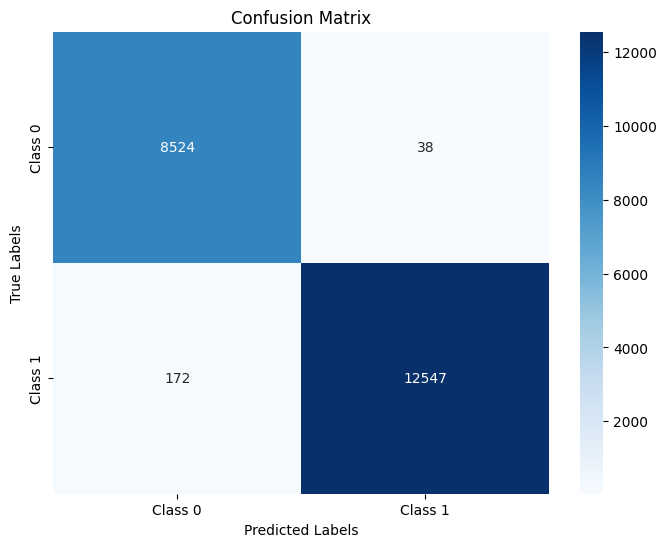

In [ ]:
confusion_matrix = np.array([[8524, 38], [172, 12547]])

# Defining class labels
class_labels = ["Class 0", "Class 1"]

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()